In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

# Large Margin Classification

In [3]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print('Target names:', iris['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [6]:
X = iris['data'][:, 2:4]  # petal length, petal width
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [7]:
# Support Vector Classifier model

svm_clf = SVC(C = float('inf'), kernel = 'linear')
svm_clf.fit(X,y)

SVC(C=inf, kernel='linear')

In [8]:
svm_clf.coef_

array([[1.29411744, 0.82352928]])

In [9]:
svm_clf.intercept_   

array([-3.78823471])

In [10]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

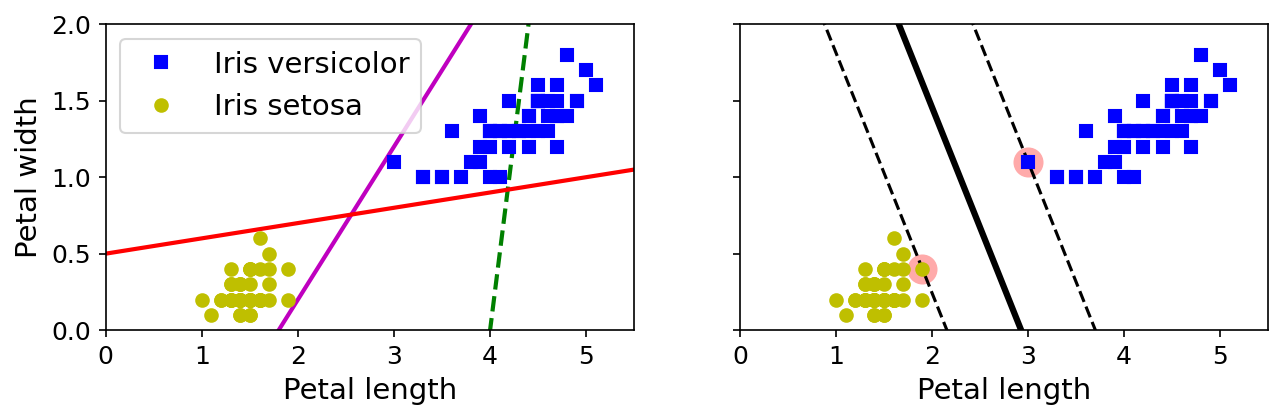

In [11]:
# Bad models

x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -(w[0]/w[1])*x0 - (b/w[1])
    
    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s = 180, facecolors = '#FFAAAA')
    plt.plot(x0, decision_boundary, linestyle = '-', linewidth = 3, color = 'black')
    plt.plot(x0, gutter_up, linestyle = '--', linewidth = 1.5, color = 'black')
    plt.plot(x0, gutter_down, linestyle = '--', linewidth = 1.5, color = 'black')
    

fig, axes = plt.subplots(1, 2, figsize=(10,2.7), sharey=True, dpi = 150)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()    

# Sensitivity to Feature scales

Unscaled intercept: [-9.68965517]
Unscaled coefficients: [[0.06896552 0.17241379]]


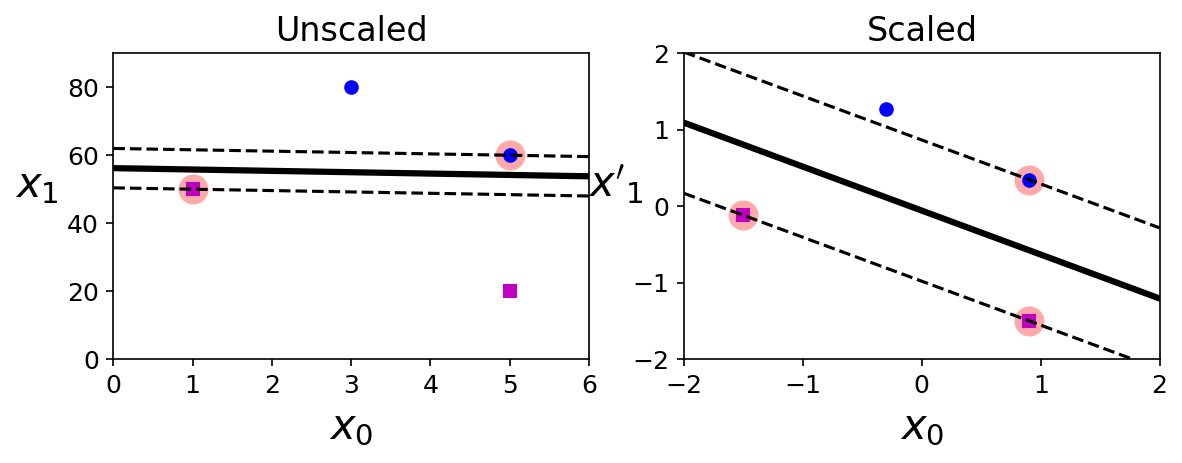

scaled intercept: [0.06246103]
scaled coefficients: [[0.62225468 1.0825318 ]]


In [12]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7), dpi = 150)
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

print('Unscaled intercept:', svm_clf.intercept_)
print('Unscaled coefficients:', svm_clf.coef_)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

plt.show()

print('scaled intercept:', svm_clf.intercept_)
print('scaled coefficients:', svm_clf.coef_)

# Sensitivity to Outliers

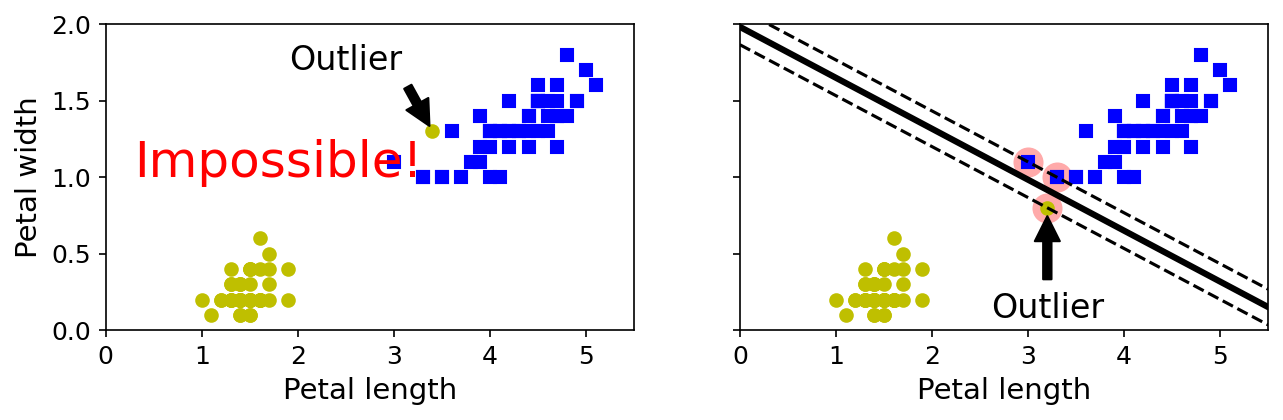

In [13]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True, dpi = 150)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

# Linear Support Vector Classifier

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

X = iris['data'][:, (2,3)]  # petal length, petal width
y = (iris['target'] == 2).astype(np.float64)  # iris virginica

In [15]:
svc_clf = Pipeline([('scaler', StandardScaler()), ('linear_svc', LinearSVC(loss = 'hinge', random_state = 42))])

svc_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(loss='hinge', random_state=42))])

In [16]:
svc_clf.predict([[5.5, 1.7]])

array([1.])

In [17]:
# Now let us generate the graphs, comparing different regularization settings:

scaler = StandardScaler()
svc_clf1 = LinearSVC(C = 1, loss = 'hinge', random_state = 42, max_iter = 2000)
svc_clf2 = LinearSVC(C = 100, loss = 'hinge', random_state = 42, max_iter = 2000)

scaled_svc_clf1 = Pipeline([('scaler', scaler), ('linear_svc', svc_clf1)])
scaled_svc_clf2 = Pipeline([('scaler', scaler), ('linear_svc', svc_clf2)])

scaled_svc_clf1.fit(X, y)
scaled_svc_clf2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', max_iter=2000,
                           random_state=42))])

In [18]:
# scaler.mean_

In [19]:
# help(svc_clf1.decision_function)

In [20]:
svc_clf1.coef_

array([[1.63328027, 2.38786154]])

In [21]:
scaler.scale_

array([1.75940407, 0.75969263])

In [22]:
# Convert the linear support vector classifiers' parameters to unscaled parameters

b1 = svc_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svc_clf2.decision_function([-scaler.mean_ / scaler.scale_])

w1 = svc_clf1.coef_[0] / scaler.scale_
w2 = svc_clf2.coef_[0] / scaler.scale_

svc_clf1.intercept_ = np.array([b1])
svc_clf2.intercept_ = np.array([b2])
svc_clf1.coef_ = np.array([w1])
svc_clf2.coef_ = np.array([w2])
w1

array([0.92831448, 3.14319431])

In [23]:
# Finding the support vectors (as LinearSVC does not do that on its own)

t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svc_clf1.support_vectors_ = X[support_vectors_idx1]
svc_clf2.support_vectors_ = X[support_vectors_idx2]

In [24]:
#a = np.array([[1,2],[3,4]]) 
#b = np.array([[11,12],[13,14]]) 
#np.dot(a,b)

In [25]:
#a = np.array([[1,2],[3,4]]) 
#b = np.array([[11,12],[13,14]]) 
#a*b

In [26]:
#a = np.array([[1,2],[3,4]]) 
#b = np.array([[11,12],[13,14]]) 
#a@b

(4.0, 5.9, 0.8, 2.8)

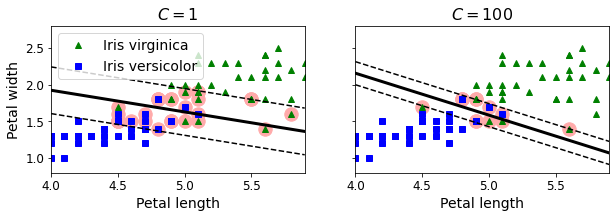

In [27]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svc_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svc_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svc_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svc_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

# Adding polynomial features

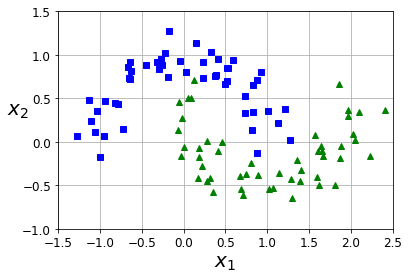

In [28]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([ ('poly_features', PolynomialFeatures(degree = 3)),
                                 
                                ('scaler', StandardScaler()), 
                                 
                               ('svm_clf', LinearSVC(C = 10, loss = 'hinge', random_state = 42, max_iter = 2000)) 
                                
                                ])

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=2000,
                           random_state=42))])

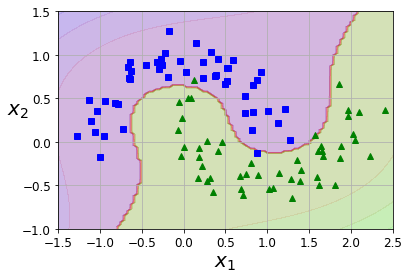

In [30]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# Polynomial kernel

In [31]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([ ('scaler', StandardScaler()),
                                ('svm_clf', SVC(C = 5, kernel = 'poly', degree = 3, coef0 = 1))
                               ])

poly100_kernel_svm_clf = Pipeline([ ('scaler', StandardScaler()),
                                ('svm_clf', SVC(C = 5, kernel = 'poly', degree = 10, coef0 = 100))
                               ])


poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [32]:
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

Text(0, 0.5, '')

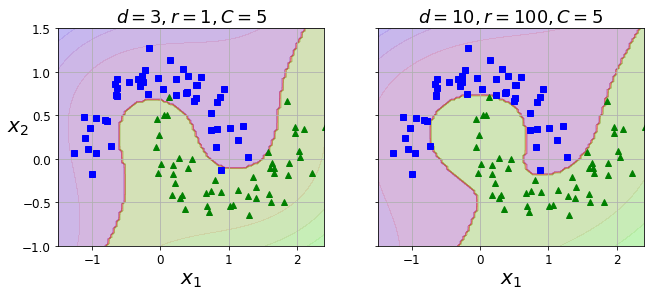

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

# Gaussian Radial Basis Function

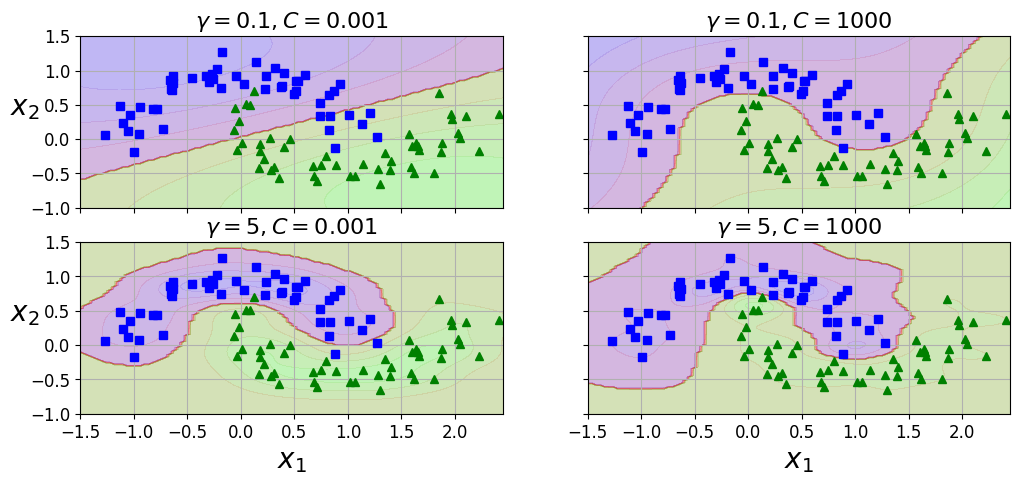

In [34]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000

hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2) 
svm_clfs = []

for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(C = C, kernel = 'rbf', gamma = gamma))
    ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)
    
fig, ax = plt.subplots(2,2, figsize = (12, 5), sharex = True, sharey = True, dpi = 100)
ax = ax.flatten()

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(ax[i])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
        
plt.show()

# Linear Regression

In [37]:
from sklearn.svm import LinearSVR

np.random.seed(42)

m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3*X + np.random.randn(m, 1)).ravel()

svm_reg = LinearSVR(epsilon = 1.5, random_state = 42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [45]:
svm_reg1 = LinearSVR(epsilon = 1.5, random_state = 42)
svm_reg2 = LinearSVR(epsilon = 0.5, random_state = 42)

svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

LinearSVR(epsilon=0.5, random_state=42)

In [46]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

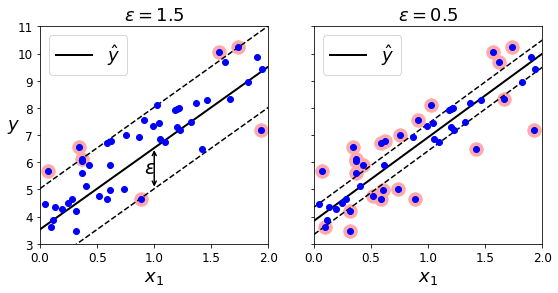

In [48]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100). reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)
    

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

plt.show()    

In [49]:
np.random.seed(42)

m = 100
X = 2*np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [51]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel = 'poly', degree = 2, C = 100, epsilon = 0.1)
svm_poly_reg2 = SVR(kernel = 'poly', degree = 2, C = 0.01, epsilon = 0.1)

svm_poly_reg1.fit(X,y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

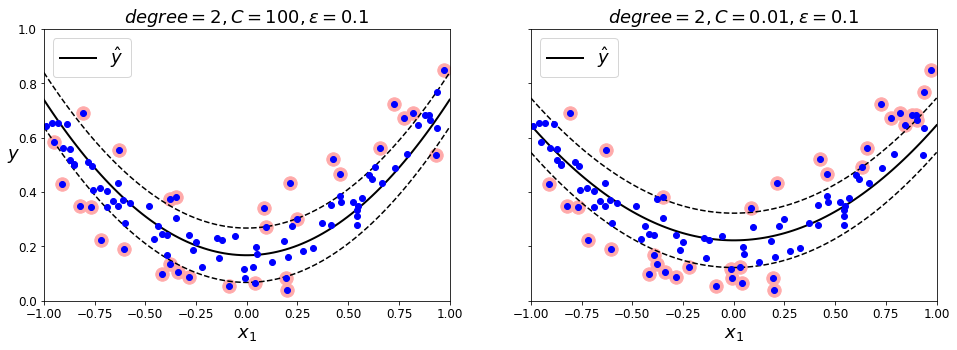

In [53]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 5), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

plt.show()